In [6]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Anamitra22/Projects/main/YBI%20Foundation/WineQT.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [8]:
df['Id'].unique()

array([   0,    1,    2, ..., 1594, 1595, 1597])

<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>

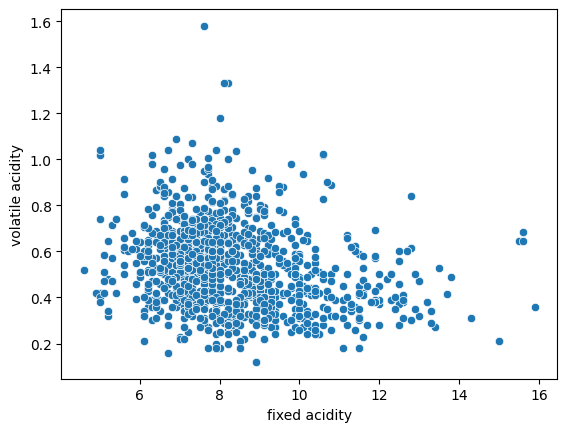

In [11]:
# check for linearity

sns.scatterplot(x = 'fixed acidity',y='volatile acidity',data=df)

In [65]:
X = df.drop(['quality','Id'],axis=1)
y = df['quality']

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [67]:
X = sc.fit_transform(X)

In [68]:
X

array([[-0.52157961,  0.93933222, -1.36502663, ...,  1.27069495,
        -0.57365783, -0.96338181],
       [-0.29259344,  1.94181282, -1.36502663, ..., -0.70892755,
         0.1308811 , -0.59360107],
       [-0.29259344,  1.27349242, -1.16156762, ..., -0.32577481,
        -0.04525363, -0.59360107],
       ...,
       [-1.20853813,  0.38239855, -0.9581086 , ...,  0.88754221,
        -0.45623467,  0.05351522],
       [-1.38027776,  0.10393172, -0.8563791 , ...,  1.33455374,
         0.60057372,  0.70063152],
       [-1.38027776,  0.6330187 , -0.75464959, ...,  1.65384769,
         0.30701583, -0.22382033]])

In [73]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64

In [74]:
from sklearn.model_selection import train_test_split

In [108]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [109]:
y_train

849    7
86     5
530    5
25     6
39     5
      ..
377    6
93     5
53     5
741    6
889    6
Name: quality, Length: 800, dtype: int64

In [110]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=1000)

In [111]:
RF.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [112]:
y_pred = RF.predict(X_test)

In [113]:
y_pred

array([5, 5, 5, 5, 5, 7, 6, 6, 5, 6, 7, 6, 5, 5, 5, 7, 5, 6, 6, 5, 6, 7,
       6, 5, 5, 5, 5, 7, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6,
       5, 7, 6, 5, 5, 6, 6, 6, 7, 6, 6, 6, 5, 5, 5, 5, 6, 6, 5, 6, 6, 5,
       6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 5, 7,
       5, 6, 5, 5, 6, 7, 5, 5, 6, 5, 5, 6, 6, 6, 6, 7, 5, 5, 5, 6, 5, 5,
       6, 6, 6, 5, 7, 5, 5, 6, 6, 5, 6, 5, 5, 5, 7, 8, 6, 6, 7, 6, 5, 6,
       6, 5, 6, 5, 5, 6, 6, 6, 5, 6, 6, 7, 6, 6, 5, 5, 6, 5, 5, 6, 6, 6,
       5, 5, 6, 5, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6, 7, 5, 5, 5, 5, 7, 6,
       7, 6, 5, 5, 6, 6, 5, 6, 6, 7, 6, 5, 6, 7, 6, 6, 6, 6, 5, 7, 6, 5,
       5, 5, 5, 5, 5, 5, 7, 7, 7, 5, 5, 6, 6, 6, 7, 5, 6, 6, 5, 7, 6, 6,
       5, 5, 7, 5, 5, 5, 5, 6, 5, 5, 7, 6, 7, 5, 6, 5, 5, 5, 6, 6, 6, 6,
       6, 6, 7, 5, 6, 6, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 6, 5, 5, 6, 5, 6,
       6, 5, 6, 6, 6, 5, 6, 5, 7, 6, 5, 5, 6, 6, 6, 5, 6, 5, 5, 6, 5, 5,
       6, 5, 7, 6, 6, 5, 6, 5, 6, 5, 7, 6, 6, 6, 6,

In [114]:
from sklearn.metrics import accuracy_score

In [115]:
print(accuracy_score(y_test, y_pred))

0.6676384839650146


In [116]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

In [117]:
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [118]:
y_pred = DT.predict(X_test)

In [119]:
print(accuracy_score(y_test, y_pred))

0.6034985422740525


In [120]:
from sklearn.svm import SVC
sv = SVC()

In [121]:
sv.fit(X_train,y_train)

SVC()

In [122]:
y_pred = sv.predict(X_test)

In [123]:
print(accuracy_score(y_test, y_pred))

0.6384839650145773
